# Run power analysis
Steps:
1. Define input data
    - Statistical parametric map array
    - Mask array
    - Data type (t- or z-values)
    - Analysis design (one- or two-sample)
    - Sample size
    - Cluster-defining threshold
    - Alpha (cluster-extent threshold)
    - FWHM
    
2. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from os.path import join

import numpy as np
import pandas as pd
import nibabel as nib

from neuropower.neuropowermodels import run_power_analysis, generate_figure

/Users/tsalo/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Values for input data
in_file = '/Users/tsalo/Downloads/task001_cope09_mirror-reversal - plain-text.nii'
dtype = 't'
n = 14
design = 'one-sample'
cdt = 0.01
alpha = 0.05
fwhm = [8., 8., 8.]
method = 'RFT'

# Load data
img = nib.load(in_file)

# Constants
n_iters = 100

# Run analysis
params, peak_df, power_df = run_power_analysis(img, n, fwhm=fwhm, mask_img=None,
                                               dtype=dtype, design=design, exc=cdt,
                                               alpha=alpha, method=method, n_iters=n_iters,
                                               seed=None)

In [3]:
peak_df.head()

,x,y,z,zval,pval
peak index,,,,,
0,-50,4,30,5.155468,0.001386
1,34,26,0,5.150798,0.001401
2,-2,0,60,5.091938,0.001606
3,50,-62,-10,5.013482,0.001928
4,34,-86,6,4.995932,0.002008


/Users/tsalo/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


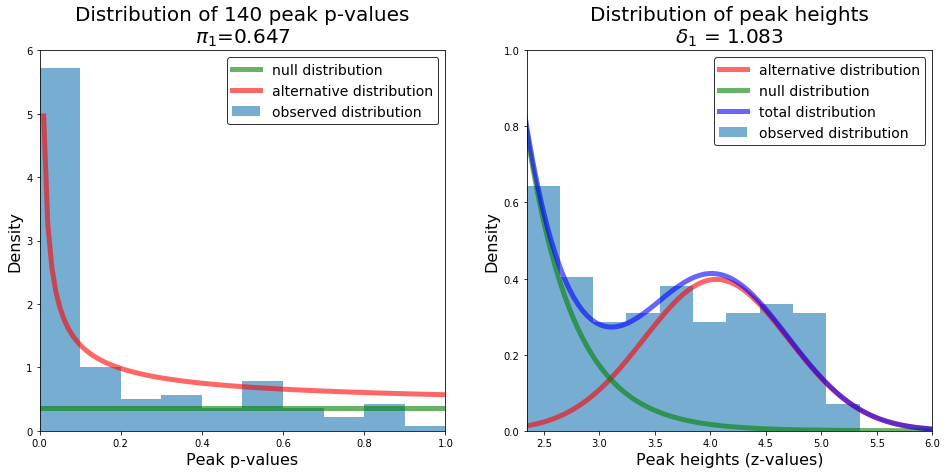

In [4]:
fig, ax = generate_figure(peak_df, params)
fig.show()

In [5]:
power_df.head()

,BF,BH,RFT,UN
sample size,,,,
14,0.004840,0.436778,0.019976,0.752013
15,0.008907,0.522863,0.033124,0.814824
16,0.015436,0.605398,0.051966,0.865364
17,0.025331,0.681277,0.077553,0.904549
18,0.039563,0.748421,0.110627,0.933920


In [6]:
# 44 without adjusting p-values
# 31 with
power_df.loc[power_df['RFT']>=0.8].iloc[:1]

,BF,BH,RFT,UN
sample size,,,,
31,0.672314,0.997955,0.836174,0.999895
